In [6]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import scipy
import matplotlib.pyplot
import matplotlib.gridspec as gridspec
from matplotlib import rcParams, cm
from pyne import serpent
from pyne import nucname
#rcParams['font.family'] = 'Times New Roman'
#rcParams['font.size'] = 14
det0 = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR-MOX/first_case/flux/init/TMSR_det0.m')
x = det0['DETflux_radX']
z = det0['DETflux_axialZ']
flux_rad = det0['DETflux_rad']
flux_rad_1 = det0['DETflux_rad1']
flux_rad_2 = det0['DETflux_rad2']
flux_axial = det0['DETflux_axial']
flux_axial_th = det0['DETflux_axial2']
flux_axial_f = det0['DETflux_axial1']

det_Pu = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR-MOX/second_case/flux/init/TMSR_det0.m')
flux_rad_Pu = det_Pu['DETflux_rad']
flux_rad_1_Pu = det_Pu['DETflux_rad1']
flux_rad_2_Pu = det_Pu['DETflux_rad2']
flux_axial_Pu = det_Pu['DETflux_axial']
flux_axial_th_Pu = det_Pu['DETflux_axial2']
flux_axial_f_Pu = det_Pu['DETflux_axial1']

det_TRU = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR-MOX/third_case/flux/init/TMSR_det0.m')
flux_rad_TRU = det_TRU['DETflux_rad']
flux_rad_1_TRU = det_TRU['DETflux_rad1']
flux_rad_2_TRU = det_TRU['DETflux_rad2']
flux_axial_TRU = det_TRU['DETflux_axial']
flux_axial_th_TRU = det_TRU['DETflux_axial2']
flux_axial_f_TRU = det_TRU['DETflux_axial1']


In [7]:
det10 = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR-MOX/first_case/flux/equil/TMSR_eq_det0.m')
eq_flux_rad = det10['DETflux_rad']
eq_flux_rad_1 = det10['DETflux_rad1']
eq_flux_rad_2 = det10['DETflux_rad2']
eq_flux_axial = det10['DETflux_axial']
eq_flux_axial_th = det10['DETflux_axial2']
eq_flux_axial_f = det10['DETflux_axial1']

det10_Pu = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR-MOX/second_case/flux/equil/TMSRPu_eq_det0.m')
eq_flux_rad_Pu = det10_Pu['DETflux_rad']
eq_flux_rad_1_Pu = det10_Pu['DETflux_rad1']
eq_flux_rad_2_Pu = det10_Pu['DETflux_rad2']
eq_flux_axial_Pu = det10_Pu['DETflux_axial']
eq_flux_axial_th_Pu = det10_Pu['DETflux_axial2']
eq_flux_axial_f_Pu = det10_Pu['DETflux_axial1']

det10_TRU = serpent.parse_det('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR-MOX/third_case/flux/equil/TMSR_eq_det0.m')
eq_flux_rad_TRU = det10_TRU['DETflux_rad']
eq_flux_rad_1_TRU = det10_TRU['DETflux_rad1']
eq_flux_rad_2_TRU = det10_TRU['DETflux_rad2']
eq_flux_axial_TRU = det10_TRU['DETflux_axial']
eq_flux_axial_th_TRU = det10_TRU['DETflux_axial2']
eq_flux_axial_f_TRU = det10_TRU['DETflux_axial1']

<IPython.core.display.Javascript object>


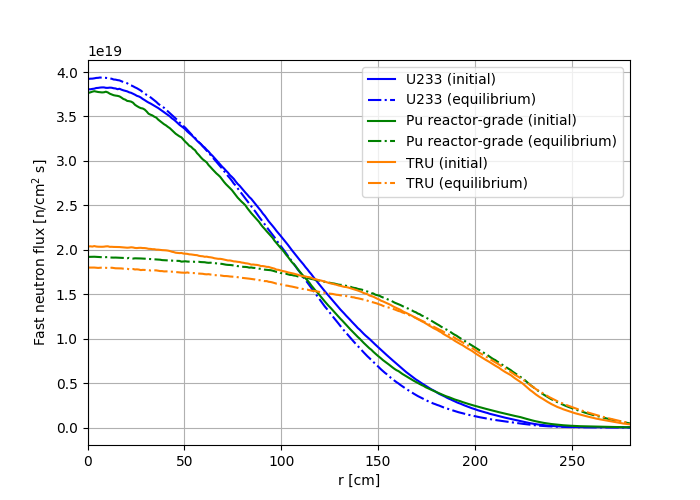

<IPython.core.display.Javascript object>


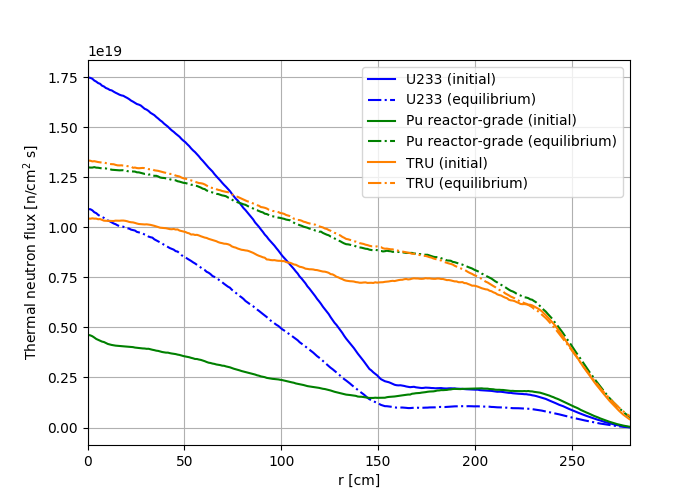

<IPython.core.display.Javascript object>


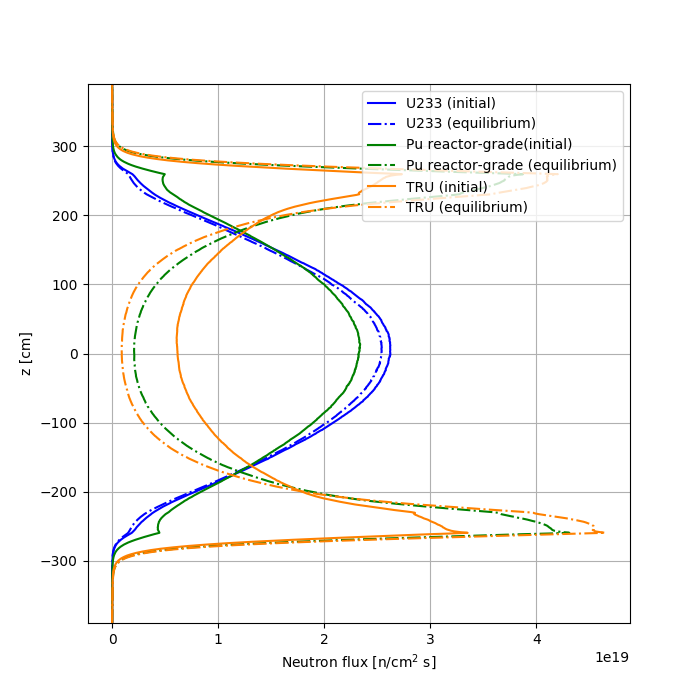

<IPython.core.display.Javascript object>


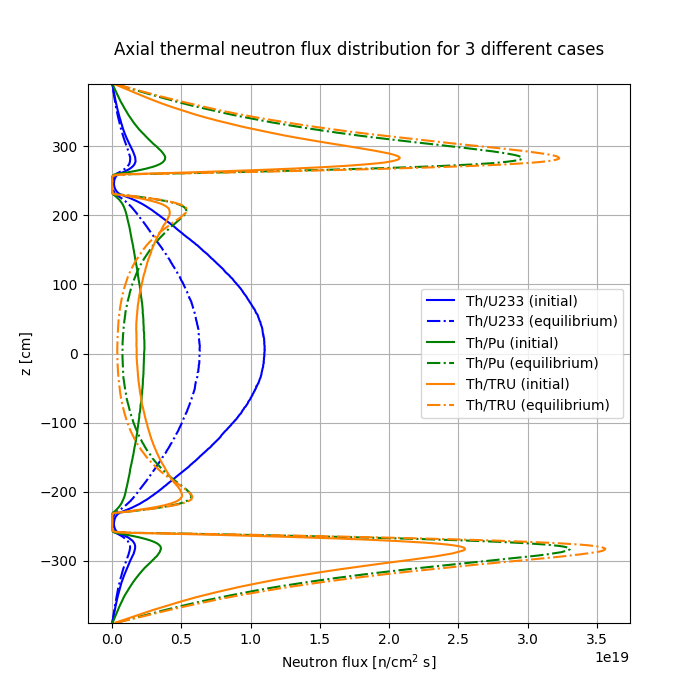

Total flux STD 0.024179 %
[ 0.0013   0.00128  0.00126  0.00128  0.00128  0.00128  0.00127  0.00127
  0.00127  0.00128  0.00127  0.00127  0.00128  0.00127  0.00127  0.00127
  0.00127  0.0013   0.00131  0.00129  0.00131  0.00131  0.00131  0.00131
  0.00133  0.00133  0.00132  0.00133  0.00133  0.00134  0.00135  0.00135
  0.00136  0.00136  0.00136  0.00137  0.00138  0.00138  0.0014   0.0014
  0.0014   0.00143  0.0014   0.00142  0.00142  0.00143  0.00144  0.00144
  0.00145  0.00146  0.00146  0.00148  0.0015   0.00148  0.0015   0.00149
  0.00151  0.00153  0.00154  0.00154  0.00156  0.00156  0.00158  0.00158
  0.0016   0.00159  0.0016   0.00161  0.00162  0.00162  0.00163  0.00163
  0.00164  0.00164  0.00165  0.00167  0.00169  0.00168  0.0017   0.00172
  0.00173  0.00174  0.00176  0.00178  0.00178  0.00179  0.00179  0.00181
  0.00182  0.00183  0.00185  0.00186  0.00188  0.00189  0.00189  0.00193
  0.00193  0.00194  0.00196  0.00198  0.00198  0.00198  0.00199  0.002
  0.00204  0.00203  0.00205 

In [35]:
# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[7,5])
ax = fig_1.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,5.5e19)
ax.set_xlim(0.0,280.0)

#ax.plot(x[:,2], flux_rad[:,10], '-',color='blue',label='Th/U233 (total)')
#ax.plot(x[:,2], flux_rad_Pu[:,10], '-',color='green',label='Th/Pu (total)')

#ax.fill_between(x[:,2], flux_rad[:,10]*(1-flux_rad[:,11]), flux_rad[:,10]*(1+flux_rad[:,11]),alpha=1, 
               #edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(x[:,2], eq_flux_rad[:,10]*(1-eq_flux_rad[:,11]), eq_flux_rad[:,10]*(1+eq_flux_rad[:,11]),alpha=1, 
               #edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.plot(x[:,2], flux_rad_1[:,10], '-',color='blue',label='U233 (initial)')
ax.plot(x[:,2], eq_flux_rad_1[:,10], '-.',color='blue',label='U233 (equilibrium)')

ax.plot(x[:,2], flux_rad_1_Pu[:,10], '-',color='green',label='Pu reactor-grade (initial)')
ax.plot(x[:,2], eq_flux_rad_1_Pu[:,10], '-.',color='green',label='Pu reactor-grade (equilibrium)')

ax.plot(x[:,2], flux_rad_1_TRU[:,10], '-',color='#ff8100',label='TRU (initial)')
ax.plot(x[:,2], eq_flux_rad_1_TRU[:,10], '-.',color='#ff8100',label='TRU (equilibrium)')

ax.legend(loc=0)
ax.set_ylabel(r'Fast neutron flux [n/cm$^2$ s]')
ax.set_xlabel('r [cm]')
#ax.set_title("Radial fast neutron flux distribution for 3 different cases\n")
fig_1.show()
fig_1.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-mox-sdtmsr/paper/figures/radial_fast_flux_init_vs_eq.png',bbox_inches='tight', dpi=1100)

# Initialize figure
fig_Pu = matplotlib.pyplot.figure(2, figsize=[7,5])
ax = fig_Pu.add_subplot(111)
ax.grid(True)
#ax.set_ylim(0,5.5e19)
ax.set_xlim(0.0,280.0)
#ax.plot(x[:,2], eq_flux_rad[:,10], '-',color='blue',label='Th/U233 (total)')
#ax.plot(x[:,2], eq_flux_rad_Pu[:,10], '-',color='green',label='Th/Pu (total)')

#ax.fill_between(x[:,2], flux_rad[:,10]*(1-flux_rad[:,11]), flux_rad[:,10]*(1+flux_rad[:,11]),alpha=1, 
               #edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
#ax.fill_between(x[:,2], eq_flux_rad[:,10]*(1-eq_flux_rad[:,11]), eq_flux_rad[:,10]*(1+eq_flux_rad[:,11]),alpha=1, 
               #edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.plot(x[:,2], flux_rad_2[:,10], '-',color='blue', label='U233 (initial)')
ax.plot(x[:,2], eq_flux_rad_2[:,10], '-.',color='blue', label='U233 (equilibrium)')

ax.plot(x[:,2], flux_rad_2_Pu[:,10], '-',color='green', label='Pu reactor-grade (initial)')
ax.plot(x[:,2], eq_flux_rad_2_Pu[:,10], '-.',color='green', label='Pu reactor-grade (equilibrium)')

ax.plot(x[:,2], flux_rad_2_TRU[:,10], '-',color='#ff8100', label='TRU (initial)')
ax.plot(x[:,2], eq_flux_rad_2_TRU[:,10], '-.',color='#ff8100',label='TRU (equilibrium)')

ax.legend(loc=0)
ax.set_ylabel(r'Thermal neutron flux [n/cm$^2$ s]')
ax.set_xlabel('r [cm]')
#ax.set_title("Radial thermal neutron flux distribution for 3 different cases\n")
fig_Pu.show()
fig_Pu.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-mox-sdtmsr/paper/figures/radial_thermal_flux_init_vs_eq.png',bbox_inches='tight', dpi=1100)

# Initialize figure
fig_3 = matplotlib.pyplot.figure(3, figsize=[7,7])
ax = fig_3.add_subplot(111)
ax.grid(True)
#ax.set_xlim(0,9e19)
ax.set_ylim(-390,390)
ax.plot(flux_axial_f[:,10],z[:,2], '-',color='blue', label='U233 (initial)')
ax.plot(eq_flux_axial_f[:,10],z[:,2], '-.',color='blue', label='U233 (equilibrium)')

ax.plot(flux_axial_f_Pu[:,10],z[:,2], '-',color='green', label='Pu reactor-grade(initial)')
ax.plot(eq_flux_axial_f_Pu[:,10],z[:,2], '-.',color='green', label='Pu reactor-grade (equilibrium)')

ax.plot(flux_axial_f_TRU[:,10],z[:,2], '-',color='#ff8100', label='TRU (initial)')
ax.plot(eq_flux_axial_f_TRU[:,10],z[:,2], '-.',color='#ff8100', label='TRU (equilibrium)')

#ax.semilogx(energy_grid[:,2], spectrum_grid_II[:,10]/np.trapz(spectrum_grid_II[:,10],energy_grid[:,2]), '-', label='Zone II', color='#ff8100')
#ax.semilogx(energy_p, (np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*0.95*spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
#ax.set_ylim(ax.get_ylim()[::-1]) # flip y axis
ax.legend(loc=0)
ax.set_xlabel(r'Neutron flux [n/cm$^2$ s]')
ax.set_ylabel('z [cm]')
#ax.set_title("Axial fast neutron flux distribution for 3 different cases\n")
fig_3.show()
#fig_3.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/axial_flux.png',bbox_inches='tight', dpi=1100)

# Initialize figure
fig_4 = matplotlib.pyplot.figure(4, figsize=[7,7])
ax = fig_4.add_subplot(111)
ax.grid(True)
#ax.set_xlim(0,9e19)
ax.set_ylim(-390,390)
ax.plot(flux_axial_th[:,10],z[:,2], '-',color='blue', label='Th/U233 (initial)')
ax.plot(eq_flux_axial_th[:,10],z[:,2], '-.',color='blue', label='Th/U233 (equilibrium)')

ax.plot(flux_axial_th_Pu[:,10],z[:,2], '-',color='green', label='Th/Pu (initial)')
ax.plot(eq_flux_axial_th_Pu[:,10],z[:,2], '-.',color='green', label='Th/Pu (equilibrium)')

ax.plot(flux_axial_th_TRU[:,10],z[:,2], '-',color='#ff8100', label='Th/TRU (initial)')
ax.plot(eq_flux_axial_th_TRU[:,10],z[:,2], '-.',color='#ff8100', label='Th/TRU (equilibrium)')

#ax.semilogx(energy_grid[:,2], spectrum_grid_II[:,10]/np.trapz(spectrum_grid_II[:,10],energy_grid[:,2]), '-', label='Zone II', color='#ff8100')
#ax.semilogx(energy_p, (np.trapz(y,energy)/np.trapz(spectrum_p,energy_p))*0.95*spectrum_p, '-', label='MCNP6 (Park et al. 2015 [4])')
#ax.set_ylim(ax.get_ylim()[::-1]) # flip y axis
ax.legend(loc=0)
ax.set_xlabel(r'Neutron flux [n/cm$^2$ s]')
ax.set_ylabel('z [cm]')
ax.set_title("Axial thermal neutron flux distribution for 3 different cases\n")
fig_4.show()
#fig_4.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/axial_flux.png',bbox_inches='tight', dpi=1100)

print('Total flux STD %f %%' %(np.mean(flux_rad_1[:-15,11])) )
print(flux_rad_1[:,11])
print('Total flux STD %f %%' %(np.mean(flux_rad_2[:-15,11])) )

In [ ]:
import math
norm_flux = fluxxy / np.max(fluxxy)
norm_breed = breed_den_0 / np.max(breed_den_0)

          
fig_6 = matplotlib.pyplot.figure(6)
ax = fig_6.add_subplot(111)
pc = ax.pcolor((norm_breed),cmap=cm.viridis)
ax.set_xlim(0,250) 
ax.set_ylim(0,250) 
ax.set_label('x [cm]')
ax.set_label('y [cm]')
ax.contourf(x_pow[:,0],y_pow[:,0], norm_breed ,50, cmap=cm.viridis)
cbar = fig_6.colorbar(pc)
cbar.set_label(r'Normalized caption reaction rate for $^{232}$Th')
fig_6.show()
#fig_6.savefig('/home/andrei2/Desktop/git/publications/2019-ashraf-rykhl-sd-tmsr-serpent/figures/breeding_dist.png',bbox_inches='tight', dpi=1100)

fig_7 = matplotlib.pyplot.figure(7)
matplotlib.pyplot.xlim(0,250) 
matplotlib.pyplot.ylim(0,250) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.title(r'Normalized neutron flux')
matplotlib.pyplot.contourf(x_pow[:,0],y_pow[:,0], norm_flux,50, cmap=cm.viridis)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()
#matplotlib.pyplot.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/2d_flux_distribution_init.png', bbox_inches='tight', dpi=1100)

In [ ]:
abs_change = eq_fluxxy-fluxxy
abs_powden_d = eq_pow_den - pow_den

print(np.average(eq_pow_den/pow_cell_vol))
print(np.average(pow_den/pow_cell_vol))
print(100*(np.amax(eq_pow_den/pow_cell_vol)-np.amax(pow_den/pow_cell_vol))/np.amax(pow_den/pow_cell_vol))

rel_flux_d = abs_change
rel_pow_d = abs_powden_d

#for i in range(len(rel_flux_d)):
#    for j in range(len(rel_flux_d)):
#        if rel_flux_d[i,j] > 1.0 and rel_flux_d[i,j] != np.inf: 
#           print (rel_flux_d[i,j])

fig_8 = matplotlib.pyplot.figure(8)
ax = fig_8.add_subplot(111)
pc = ax.pcolor((rel_flux_d),cmap=cm.viridis)
ax.set_xlim(0,250) 
ax.set_ylim(0,250) 
ax.set_label('x [cm]')
ax.set_label('y [cm]')
#ax.set_title(r'Neutron flux change')
ax.contourf(x_pow[:,0],y_pow[:,0], rel_flux_d ,50, cmap=cm.viridis)
cbar = fig_8.colorbar(pc)
cbar.set_label(r'Neutron flux change after changing composition [%]')
fig_8.show()
#fig_8.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/2d_flux_distribution_init.png', bbox_inches='tight', dpi=1100)

fig_9 = matplotlib.pyplot.figure(9)
ax = fig_9.add_subplot(111)
pc = ax.pcolor((rel_pow_d),cmap=cm.viridis)
ax.set_xlim(0,250) 
ax.set_ylim(0,250) 
ax.set_label('x [cm]')
ax.set_label('y [cm]')
#ax.set_title(r'Neutron flux change')
ax.contourf(x_pow[:,0],y_pow[:,0], rel_pow_d,50, cmap=cm.viridis)
cbar = fig_9.colorbar(pc)
cbar.set_label(r'Power density change after changing composition [%]')
fig_9.show()
#fig_9.savefig('/home/andrei2/Desktop/git/saltproc-validation/SD-TMSR/doc/plots_initial_comp_safety_param/2d_flux_distribution_init.png', bbox_inches='tight', dpi=1100)

In [ ]:
q =  norm_breed / norm_flux
#for i in range(np.shape(q)[0]):
#    for j in range(np.shape(q)[1]):
#        if q[i,j] > 1.15:
#            q[i,j] = np.nan
          
fig_10 = matplotlib.pyplot.figure(9)
matplotlib.pyplot.xlim(0,250) 
matplotlib.pyplot.ylim(0,250) 
matplotlib.pyplot.xlabel('x [cm]')
matplotlib.pyplot.ylabel('y [cm]')
matplotlib.pyplot.contourf(x_pow[:,0],y_pow[:,0], q, 20, cmap=cm.viridis)
matplotlib.pyplot.colorbar()
matplotlib.pyplot.show()


In [ ]:
# Calculate total fission power in Zone I and Zone II
zoneI_flux = det0['DET1']
zoneI_flux_eq = det10['DET1']
zoneII_flux = det0['DET2']
zoneII_flux_eq = det10['DET2']

zoneI = np.mean(zoneI_flux[:,10])
zoneI_eq = np.mean(zoneI_flux_eq[:,10])
zoneI_uncrt = 100*np.mean(zoneI_flux[:,11])
zoneI_uncrt_eq = 100*np.mean(zoneI_flux_eq[:,11])
zoneII = np.mean(zoneII_flux[:,10])
zoneII_eq = np.mean(zoneII_flux_eq[:,10])
zoneII_uncrt = 100*np.mean(zoneII_flux[:,11])
zoneII_uncrt_eq = 100*np.mean(zoneII_flux_eq[:,11])
print (r'Zone I total power %E +- %f %%' %(zoneI, zoneI_uncrt) )
print (r'Zone II total power %E +- %f %%' %(zoneII, zoneII_uncrt) )
print('Equilibrium')
print (r'Zone I total power %E +- %f %%' %(zoneI_eq, zoneI_uncrt_eq) )
print (r'Zone II total power %E +- %f %%' %(zoneII_eq, zoneII_uncrt_eq) )
print ('\nInitial total flux %E +- %f %%' %((zoneI+zoneI),(zoneI_uncrt+zoneII_uncrt)/2) )
print (r'Equilbrium total flux %E +- %f %%' %((zoneI_eq+zoneI_eq),(zoneI_uncrt_eq+zoneII_uncrt_eq)/2) )
print ('\nTable. Power generation fraction in each zone for initial and equilibrium state.')
print ('___________Initial_______________________Equlibrium')
print (r'Zone I    %f +- %f %%           %f +- %f %%' %(100*zoneI/(zoneI+zoneII),zoneI_uncrt, 100*zoneI_eq/(zoneI_eq+zoneII_eq), zoneI_uncrt_eq)) 
print (r'Zone II   %f +- %f %%           %f +- %f %%' %( 100*zoneII/(zoneI+zoneII), zoneII_uncrt, 100*zoneII_eq/(zoneI_eq+zoneII_eq), zoneII_uncrt_eq) )
